## Final Project: Alexis Valdes

In [163]:
import numpy as np
import sep
import astropy.io.fits as fit
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [164]:
# read the hubble ultra deep field image 
hdul = fit.open('image_data/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
# print(hdul.info())

data = hdul[0].data
data = data.byteswap().newbyteorder()

# print(data[2500])
# print(data.dtype.name, data.shape)
hdul.close()

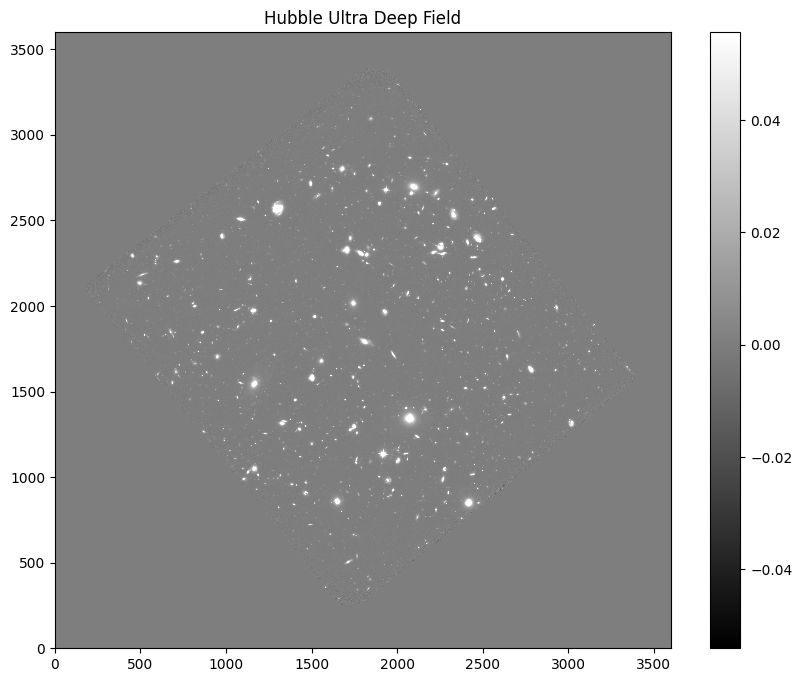

In [165]:
# show the image and save the figure
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.title('Hubble Ultra Deep Field')
plt.colorbar();

0.0
0.0005398219218477607


Text(0.5, 1.0, 'Original Backgorund')

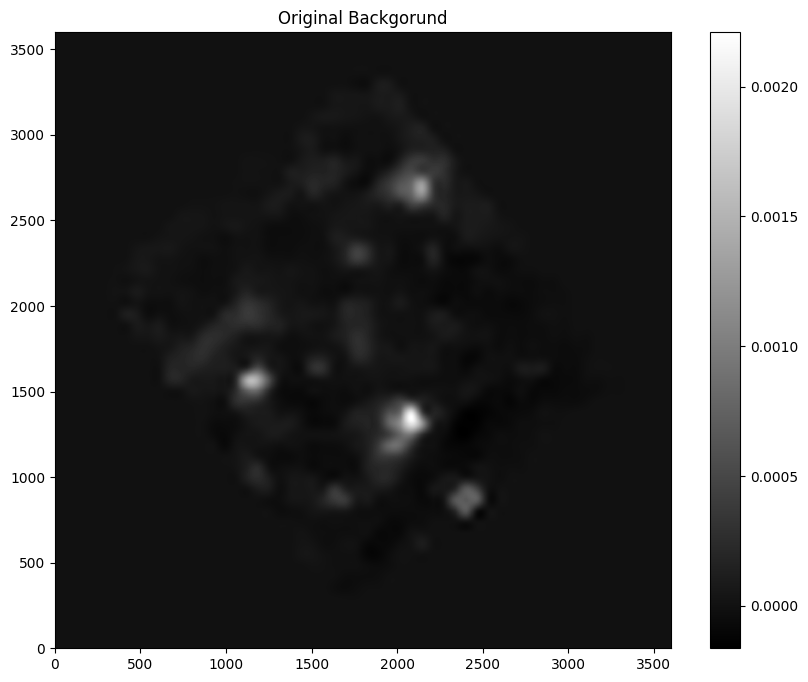

In [166]:
# measure the spacially vering background on the image
bkg = sep.Background(data)

# get a gobal mean and noise of the image background
print(bkg.globalback)
print(bkg.globalrms)

# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()

# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.title('Original Backgorund')

Text(0.5, 1.0, 'Original Backgorund Noise')

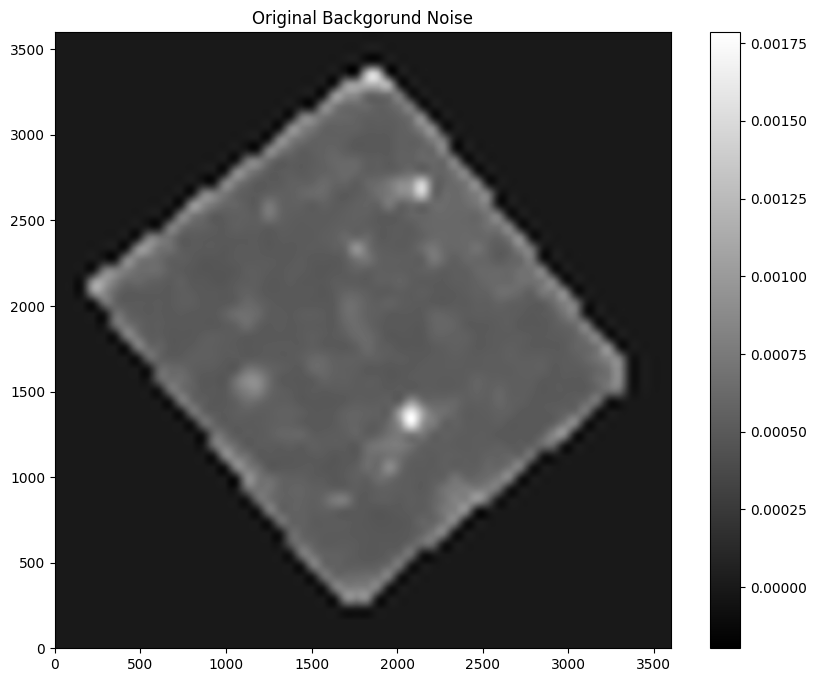

In [167]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

# plot the backgorund noise 
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.title('Original Backgorund Noise')

In [168]:
# subtract the background
data_sub = data - bkg

objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# how many objects were detected
len(objects)

8633

#### how many sources did you find?
There were 8641 total sources found in this image of the hubble Ultra deep field.

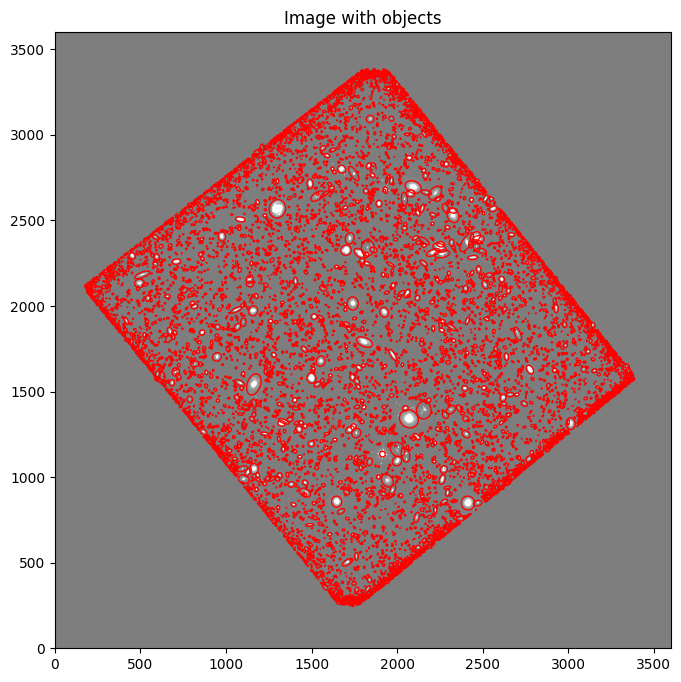

In [169]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    
plt.title('Image with objects')
plt.show()

#### What are the mean, median, and standard deviation of the distribution of fluxes. 

                         flux mean:  0.36213768591645823
                         flux median:  0.030976216696435587
                         flux standard deviation:  9.247269547735229


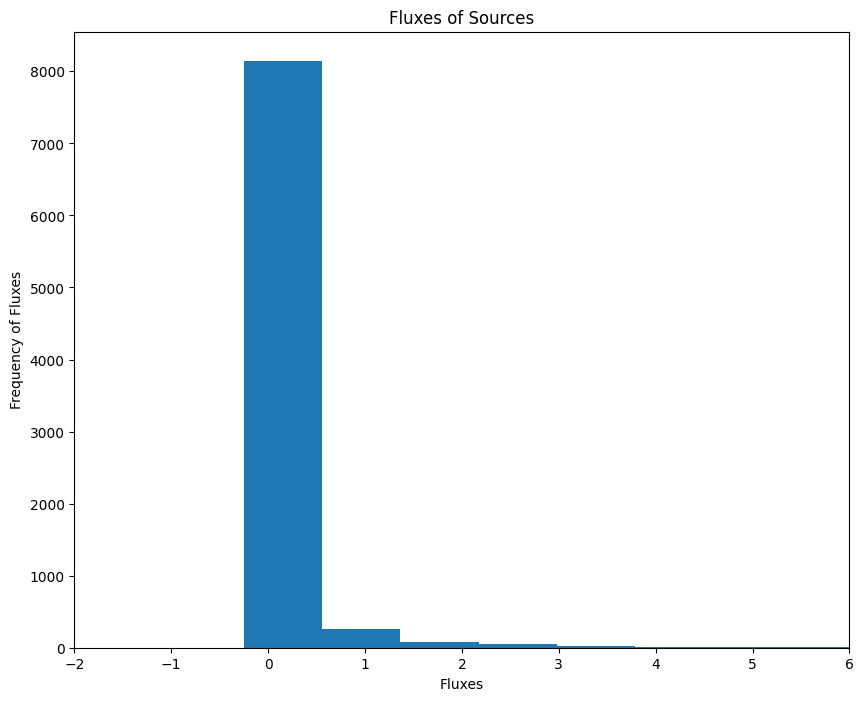

In [170]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)
flux_mean = np.mean(flux)
flux_median = np.median(flux)
flux_std = np.std(flux)

print('                         flux mean: ', flux_mean)
print('                         flux median: ', flux_median)
print('                         flux standard deviation: ', flux_std)
fig, axs = plt.subplots()

ax1 = plt.subplot()
ax1.hist(flux, bins=1000)
ax1.set_xlim(-2, 6)
ax1.set_title('Fluxes of Sources')
ax1.set_xlabel('Fluxes')
ax1.set_ylabel('Frequency of Fluxes')
plt.show()

#### What is the largest outlier in the distribution, where is it on the image, and how many standard deviations is it away from the mean? 
1. The largest outlier in the distrubution is source 2061 with the flux outlier of 807.2972835731507.
2. In the bottom image, it is the object inside the blue circle.
3. The standard deviation is 9.238190841374934 so for the source 2061 it is around 87.34 standard deviations away from the mean.

                           Biggest flux outlier  807.2972835731507
                           Number of Object  2061


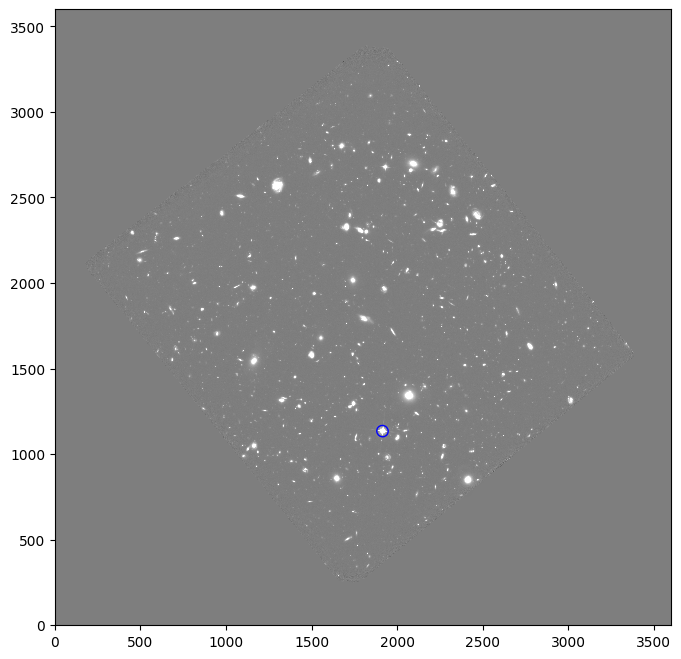

In [171]:
print('                           Biggest flux outlier ', max(flux))
print('                           Number of Object ', flux.argmax())

fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')
e = Ellipse(xy=(objects['x'][2061], objects['y'][2061]),
            width=12*objects['a'][2061],
            height=12*objects['b'][2061],
            angle=objects['theta'][2061] * 180. / np.pi)
e.set_facecolor('none')
e.set_edgecolor('blue')
ax.add_artist(e)

plt.show()

#### False 3-color image